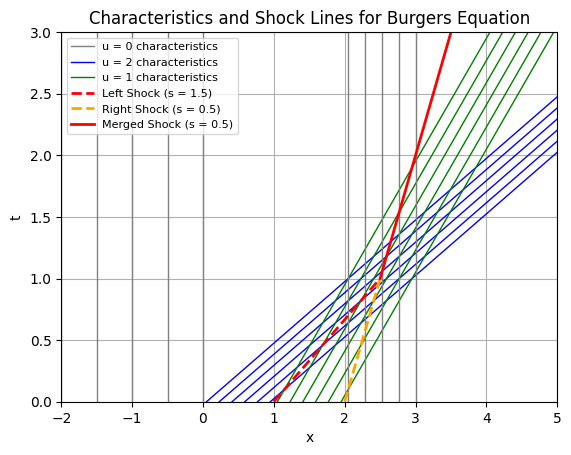

In [39]:
import numpy as np
import matplotlib.pyplot as plt

#Problem 1
t_max = 3
t_vals = np.linspace(0, t_max, 300)

def plot_characteristic(x0, u, style, label=None):
    x_vals = x0 + u * t_vals
    plt.plot(x_vals, t_vals, style, linewidth=1, label=label)

x0_vals_region1 = np.linspace(-2, 0, 5)
x0_vals_region2 = np.linspace(0.05, 0.95, 6)
x0_vals_region3 = np.linspace(1.05, 1.95, 6)
x0_vals_region4 = np.linspace(2.05, 3, 5)

for i, x0 in enumerate(x0_vals_region1):
    label = "u = 0 characteristics" if i == 0 else None
    plot_characteristic(x0, 0, 'gray', label=label)

for i, x0 in enumerate(x0_vals_region2):
    label = "u = 2 characteristics" if i == 0 else None
    plot_characteristic(x0, 2, 'blue', label=label)

for i, x0 in enumerate(x0_vals_region3):
    label = "u = 1 characteristics" if i == 0 else None
    plot_characteristic(x0, 1, 'green', label=label)

for i, x0 in enumerate(x0_vals_region4):
    label = "u = 0 characteristics" if i == 0 and len(x0_vals_region1) == 0 else None
    plot_characteristic(x0, 0, 'gray', label=label)

t_shock = np.linspace(0, 1, 200)
x_shock1 = 1 + 1.5 * t_shock
x_shock2 = 2 + 0.5 * t_shock

plt.plot(x_shock1, t_shock, 'r--', linewidth=2, label='Left Shock (s = 1.5)')
plt.plot(x_shock2, t_shock, 'orange', linestyle='--', linewidth=2, label='Right Shock (s = 0.5)')

t_post_merge = np.linspace(1, t_max, 200)
x_post_merge = 2.5 + 0.5 * (t_post_merge - 1)
plt.plot(x_post_merge, t_post_merge, 'red', linestyle='-', linewidth=2, label='Merged Shock (s = 0.5)')

plt.xlabel("x")
plt.ylabel("t")
plt.title("Characteristics and Shock Lines for Burgers Equation")
plt.legend(loc='upper left', fontsize=8)
plt.grid(True)
plt.xlim(-2, 5)
plt.ylim(0, t_max)

plt.show()


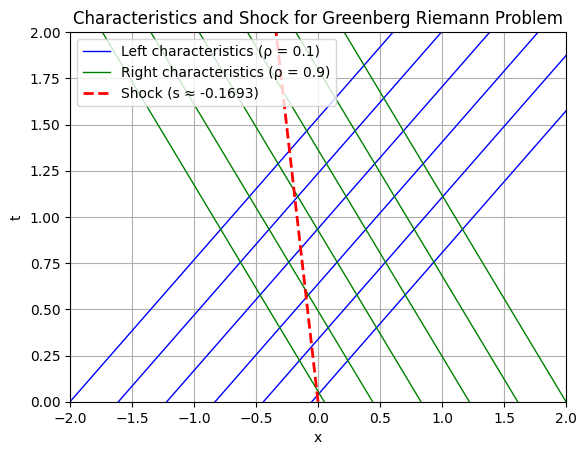

In [40]:
#Problem 2b
rho_L = 0.1
rho_R = 0.9

s_L = -np.log(rho_L) - 1
s_R = -np.log(rho_R) - 1

f_L = -rho_L * np.log(rho_L)
f_R = -rho_R * np.log(rho_R)
shock_speed = (f_R - f_L) / (rho_R - rho_L)

t_max = 2
t_vals = np.linspace(0, t_max, 300)
x0_left = np.linspace(-2, -0.05, 6)
x0_right = np.linspace(0.05, 2, 6)

for i, x0 in enumerate(x0_left):
    label = "Left characteristics (ρ = 0.1)" if i == 0 else None
    x = x0 + s_L * t_vals
    plt.plot(x, t_vals, 'blue', linewidth=1, label=label)

for i, x0 in enumerate(x0_right):
    label = "Right characteristics (ρ = 0.9)" if i == 0 else None
    x = x0 + s_R * t_vals
    plt.plot(x, t_vals, 'green', linewidth=1, label=label)

x_shock = shock_speed * t_vals
plt.plot(x_shock, t_vals, 'r--', linewidth=2, label=f'Shock (s ≈ {shock_speed:.4f})')

plt.xlabel("x")
plt.ylabel("t")
plt.title("Characteristics and Shock for Greenberg Riemann Problem")
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(0, t_max)
plt.show()


Minimum derivative value ≈ -0.6324 at x ≈ -0.3504
Approximate shock formation time: t_s ≈ 1.5812


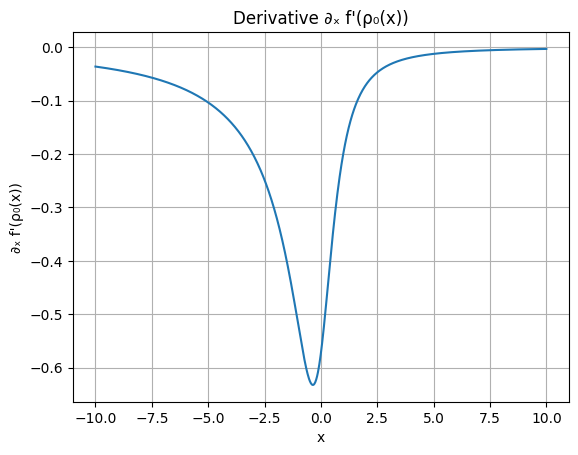

In [41]:
#Problem 2c numerical check

def rho0(x):
    return 0.5 + (0.9 / np.pi) * np.arctan(x)

def dfprime_dx(x):
    drho0_dx = 0.9 / (np.pi * (1 + x**2))
    return -1 / rho0(x) * drho0_dx

x_vals = np.linspace(-10, 10, 1000)
dfprime_dx_vals = dfprime_dx(x_vals)

min_index = np.argmin(dfprime_dx_vals)
min_x = x_vals[min_index]
min_value = dfprime_dx_vals[min_index]

print(f"Minimum derivative value ≈ {min_value:.4f} at x ≈ {min_x:.4f}")
print(f"Approximate shock formation time: t_s ≈ {-1 / min_value:.4f}")

plt.plot(x_vals, dfprime_dx_vals)
plt.title("Derivative ∂ₓ f'(ρ₀(x))")
plt.xlabel("x")
plt.ylabel("∂ₓ f'(ρ₀(x))")
plt.grid()
plt.show()


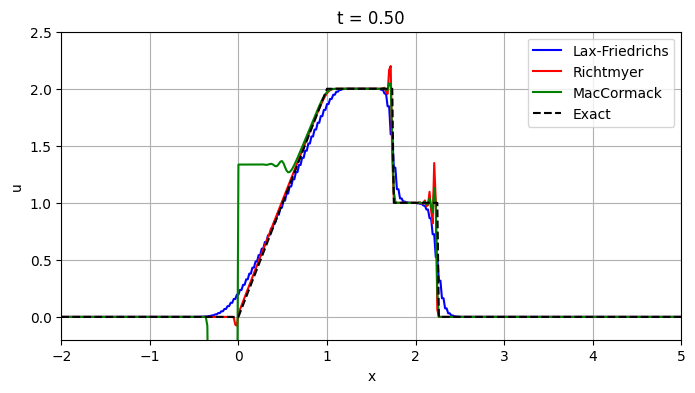

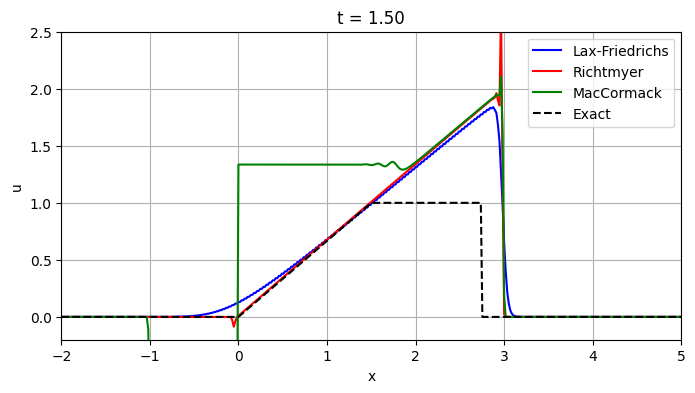

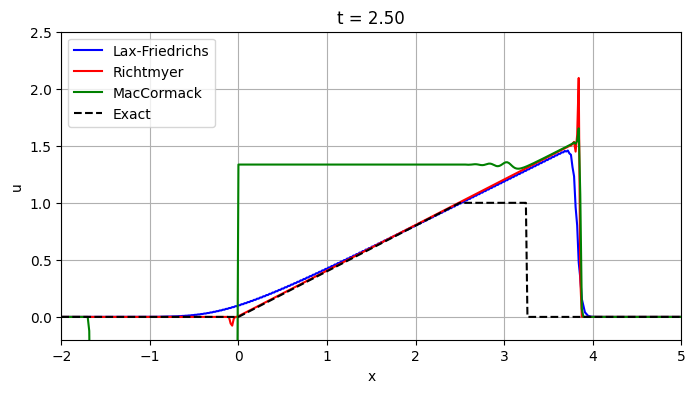

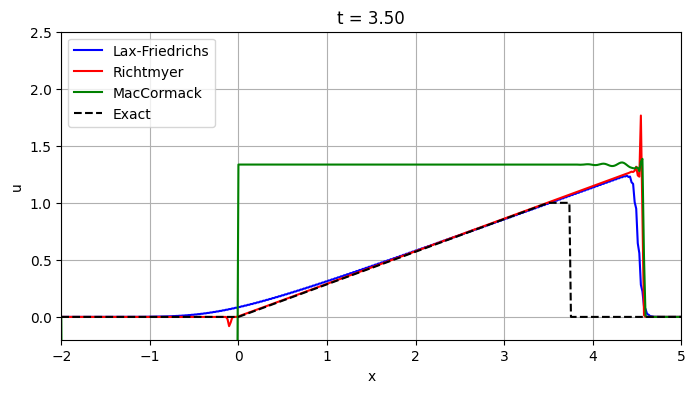

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -2.0, 5.0
nx = 400
x = np.linspace(x_min, x_max, nx)
dx = x[1] - x[0]
cfl = 0.9
times_to_plot = [0.5, 1.5, 2.5, 3.5]

def initial_data(x):
    return np.where(x < 0, 0.0,
           np.where(x < 1, 2.0,
           np.where(x < 2, 1.0, 0.0)))

def flux(u):
    return 0.5 * u**2

def exact_solution(x, t):
    u = np.zeros_like(x)
    if t < 1:
        for i, xi in enumerate(x):
            if xi < 0:
                u[i] = 0
            elif xi <= 2 * t:
                u[i] = xi / t
            elif xi <= 1 + 1.5 * t:
                u[i] = 2
            elif xi <= 2 + 0.5 * t:
                u[i] = 1
    else:
        for i, xi in enumerate(x):
            if xi < 0:
                u[i] = 0
            elif xi <= t:
                u[i] = xi / t
            elif xi <= 0.5 * t + 2:
                u[i] = 1
    return u

def lax_friedrichs(u, dt):
    un = u.copy()
    un[1:-1] = 0.5 * (u[2:] + u[:-2]) - dt / (2 * dx) * (flux(u[2:]) - flux(u[:-2]))
    un[0], un[-1] = u[0], u[-1]
    return un

def richtmyer(u, dt):
    u_half = 0.5 * (u[1:] + u[:-1]) - dt / (2 * dx) * (flux(u[1:]) - flux(u[:-1]))
    un = u.copy()
    un[1:-1] = u[1:-1] - dt / dx * (flux(u_half[1:]) - flux(u_half[:-1]))
    un[0], un[-1] = u[0], u[-1]
    return un

def maccormack(u, dt):
    u_star = u.copy()
    u_star[1:-1] = u[1:-1] - dt / dx * (flux(u[2:]) - flux(u[1:-1]))
    un = u.copy()
    un[1:-1] = 0.5 * (u[1:-1] + u_star[1:-1]
                      - dt / dx * (flux(u_star[1:-1]) - flux(u_star[:-2])))
    un[0], un[-1] = u[0], u[-1]
    return un

def solve_and_plot():
    u_lf = initial_data(x)
    u_rm = initial_data(x)
    u_mc = initial_data(x)
    t = 0.0

    for t_target in times_to_plot:
        while t < t_target - 1e-12:
            max_speed = max(np.max(np.abs(u_lf)),
                            np.max(np.abs(u_rm)),
                            np.max(np.abs(u_mc)),
                            1e-6)
            dt = cfl * dx / max_speed
            if t + dt > t_target:
                dt = t_target - t

            u_lf = lax_friedrichs(u_lf, dt)
            u_rm = richtmyer(u_rm, dt)
            u_mc = maccormack(u_mc, dt)
            t += dt

        plt.figure(figsize=(8, 4))
        plt.plot(x, u_lf, 'b', label='Lax-Friedrichs')
        plt.plot(x, u_rm, 'r', label='Richtmyer')
        plt.plot(x, u_mc, 'g', label='MacCormack')
        plt.plot(x, exact_solution(x, t_target), 'k--', label='Exact')
        plt.title(f't = {t_target:.2f}')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.legend()
        plt.grid(True)
        plt.xlim(x_min, x_max)
        plt.ylim(-0.2, 2.5)
        plt.show()

solve_and_plot()
